# <center>k近邻法</center>

## 模型
对于新的输入实例,在训练集中找到与该实例最邻近的k个实例，这k个实例的多数属于某个分类,就把该输入实例分为这个类

## kd-tree
一种树型数据结构,可以快速找到一个输入实例最近的k个实例


nearest neighbor of [7.  1.1] is [7 2]


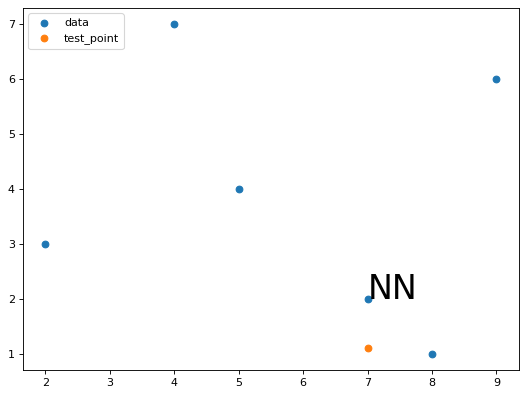

In [23]:
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

Node = namedtuple("Node", ["value", "left", "right"])
NNRecord = namedtuple("NNRecord", ["value", "distance"])


class KdTree:
    def __init__(self, X_train):
        self.X_train = X_train
        self.dims = len(X_train[0])
        self.root = self._build(X_train, 0)

    def _build(self, X, depth):
        if len(X) == 0:
            return None
        axis = depth % self.dims
        X = X[X[:, axis].argsort()]  # X now is sorted with the axis column
        middle = len(X) // 2
        return Node(
            value=X[middle],
            left=self._build(X[:middle], depth + 1),
            right=self._build(X[middle + 1:], depth + 1),
        )

    def find_nearest_neighbor(self, point):
        best = None

        def _search(tree, depth):
            nonlocal best

            if tree is None:
                return

            dist = self.euclidean_distance(tree.value, point)
            if best is None or dist < best.distance:
                best = NNRecord(tree.value, dist)

            axis = depth % self.dims
            diff = point[axis] - tree.value[axis]
            if diff <= 0:
                close, away = tree.left, tree.right
            else:
                close, away = tree.right, tree.left

            _search(close, depth + 1)
            # x为圆心,x到best为半径的圆与超平面有交点,说明超平面另一侧可能存在比best更近的点
            if diff ** 2 < best.distance:
                _search(away, depth + 1)

        _search(self.root, 0)
        return best.value

    def euclidean_distance(self, a, b):
        return np.linalg.norm(a - b, ord=2)


points = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
model = KdTree(points)
test_point = np.array([7, 1.1])
nn = model.find_nearest_neighbor(test_point)
print(f'nearest neighbor of {test_point} is {nn}')
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(points[:, 0], points[:, 1], label='data')
plt.scatter(test_point[0], test_point[1], label='test_point')
plt.text(nn[0], nn[1], "NN", fontsize=30)
plt.legend(loc='upper left')